In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt


Welcome to JupyROOT 6.20/04


In [2]:
sg_file = uproot.open("/data/event/final/sg_100ppwax/Events/run_01/tag_1_delphes_events.root") 
bg_file = uproot.open("/data/event/final/bg_ppaalvll/Events/run_01/tag_1_delphes_events.root")
# event/bg_sm100

In [3]:
def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array(),
              file["Delphes;1"]["Event.CrossSection"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 
    

In [4]:
bg_events = file_np(bg_file)
sg_events = file_np(sg_file)

In [5]:
me = 0.000511
mu = 0.10566
################################################
def prlen(events):
    print(len(events))

################################################  sel
def num_sl(event,lab,num):
    where1 = np.where(event[:,lab]==num)
    return event[where1]

def l_sl(event):
    where1 = np.where(event[:,0]+event[:,4]==1)
    return event[where1]
       
################################################  maa caculate
def m_aa(events, m, pt1):
    where1=[]   
    for i in range(len(events)):
        p = [0,0,0,0] 
        for j in range(events[i][8]):
            pt = events[i][9][j]   
            eta = events[i][10][j]  
            phi = events[i][11][j]    
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
            p[3] = p[3] + pt*np.sinh(eta)   ### pz
            p[0] = p[0] + np.sqrt( (pt*np.cos(phi))**2 + (pt*np.sin(phi))**2 + (pt*np.sinh(eta))**2 )     
        maa = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(maa)
        pTaa = np.sqrt(p[1]**2 + p[2]**2)
        pt1.append(pTaa)
        if 90<maa<110:
            where1.append(i)
    return events[where1]
################################################        
def pt_sl(events):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]    
        for j in range(events[i][8]):
            pt = events[i][9][j]    
            eta = events[i][10][j]    
            phi = events[i][11][j]   
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
        pTaa = np.sqrt(p[1]**2 + p[2]**2)    
        if pTaa>50:
              where1.append(i)
    return events[where1]
################################################
def mvl_sl(events,m):
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(mlv)
################################################## must 1l events
def MTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        
        m.append(mlv)
        pt.append(ptlv)
        if mlv > 58:
            where1.append(i)
    return(events[where1])
##################################################   
def PTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        m.append(mlv)
        pt.append(ptlv)
        if ptlv > 50:
            where1.append(i)
    return(events[where1])
#######################################################################################
def phi_v(events,phi_list):
    for i in range(len(events)):
        if events[i][0]==1:
            for j in range(len(events[i][3])):
                phi = (events[i][2][j])
                phi_list.append(phi)
        elif events[i][4]==1:
            for j in range(len(events[i][7])):
                phi = events[i][6][j]
                phi_list.append(phi)  
                
def miss_v(events,phi_list):
    for i in range(len(events)):
        for j in range(len(events[i][16])):
            phi = (events[i][17][j])
            phi_list.append(phi)
  

sg no sl : 10000
sg after 2aa sl : 4488
sg after 2aa_1l sl : 2927
sg after 2aa_1l_pt sl : 2709
sg after 2aa_1l_pt and 90<maa<110 sl : 2675

bg no sl : 100000
bg after 2aa sl : 40390
bg after 2aa_1l sl : 24564
bg after 2aa_1l_pt sl : 3201
bg after 2aa_1l_pt and 90<maa<110 sl : 369


<function matplotlib.pyplot.show(close=None, block=None)>

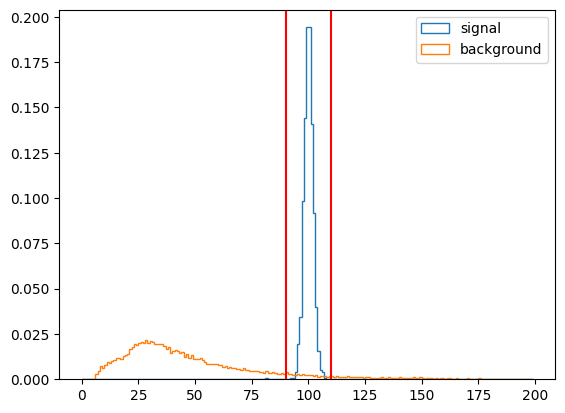

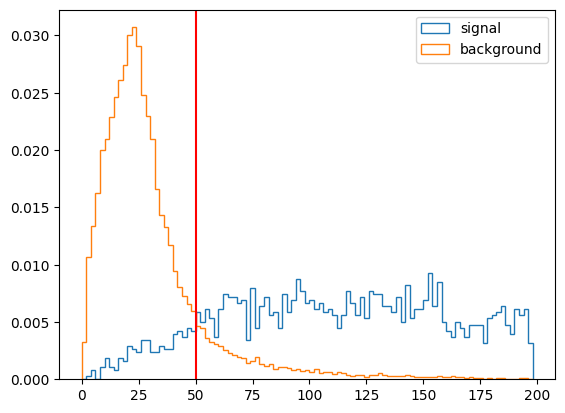

In [16]:
####################################################################################### two_a , 1_l , maa , pt sel
sgsl_2a = num_sl(sg_events,8,2)
sgsl_2a_1l = l_sl(sgsl_2a)
bgsl_2a = num_sl(bg_events,8,2)
bgsl_2a_1l = l_sl(bgsl_2a)
####################### drow picture use
maa_sgsl_2a_1l=[]
pt_sgsl_2a_1l=[]
maa_bgsl_2a_1l=[]
pt_bgsl_2a_1l=[]
####################### evnts num  use
maa_sgsl_2a_1l_pt=[]
pt_sgsl_2a_1l_pt=[]
maa_bgsl_2a_1l_pt=[]
pt_bgsl_2a_1l_pt=[]
################################## maa sl result (drow pic)
sgsl_2a_1l_msl = m_aa(sgsl_2a_1l,maa_sgsl_2a_1l,pt_sgsl_2a_1l)   ###msl   90<max<110
bgsl_2a_1l_msl = m_aa(bgsl_2a_1l,maa_bgsl_2a_1l,pt_bgsl_2a_1l) 
################################## vnts num  result
sgsl_2a_1l_pt = pt_sl(sgsl_2a_1l)
bgsl_2a_1l_pt = pt_sl(bgsl_2a_1l)

sgsl_2a_1l_pt_msl = m_aa(sgsl_2a_1l_pt,maa_sgsl_2a_1l_pt,pt_sgsl_2a_1l_pt)   # final sl  sgsl_2a_1l_pt_msl
bgsl_2a_1l_pt_msl = m_aa(bgsl_2a_1l_pt,maa_bgsl_2a_1l_pt,pt_bgsl_2a_1l_pt)   # final sl  bgsl_2a_1l_pt_msl

print('\033[0;34msg no sl :\033[0m',len(sg_events))
print('\033[0;34msg after 2aa sl :\033[0m',len(sgsl_2a))
print('\033[0;34msg after 2aa_1l sl :\033[0m',len(sgsl_2a_1l))
print('\033[0;34msg after 2aa_1l_pt sl :\033[0m',len(sgsl_2a_1l_pt))
print('\033[0;34msg after 2aa_1l_pt and 90<maa<110 sl :\033[0m',len(sgsl_2a_1l_pt_msl))
print('')
print('\033[0;33mbg no sl :\033[0m',len(bg_events))
print('\033[0;33mbg after 2aa sl :\033[0m',len(bgsl_2a))
print('\033[0;33mbg after 2aa_1l sl :\033[0m',len(bgsl_2a_1l))
print('\033[0;33mbg after 2aa_1l_pt sl :\033[0m',len(bgsl_2a_1l_pt))
print('\033[0;33mbg after 2aa_1l_pt and 90<maa<110 sl :\033[0m',len(bgsl_2a_1l_pt_msl))

################################## drow maa pt to decide pt cut

plt.figure(1)
bins=np.arange(0,200,1) 
plt.hist(maa_sgsl_2a_1l, bins=bins, label="signal", histtype='step',density='ture')
plt.hist(maa_bgsl_2a_1l, bins=bins, label="background", histtype='step',density='ture')
plt.axvline(90, color='r')
plt.axvline(110, color='r')
plt.legend()
plt.show

plt.figure(2)
bins=np.arange(0,200,2)
plt.hist(pt_sgsl_2a_1l, bins=bins, label="signal", histtype='step', density='ture')
plt.hist(pt_bgsl_2a_1l, bins=bins, label="background", histtype='step',density='ture')
plt.axvline(50, color='r')
plt.legend()
plt.show
#######################################from fig2 pt_cut>50

sg after 2aa_1l_pt , 90<maa<110 , PTvl>50 sl : 2572
sg after 2aa_1l_pt , 90<maa<110 , PTvl>50 ,MTvl>58 sl : 1602

bg after 2aa_1l_pt , 90<maa<110 , PTvl>50 sl : 287
bg after 2aa_1l_pt , 90<maa<110 , PTvl>50 ,MTvl>58 sl : 141


<function matplotlib.pyplot.show(close=None, block=None)>

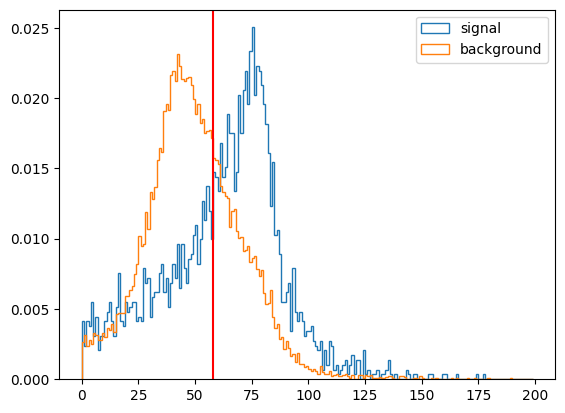

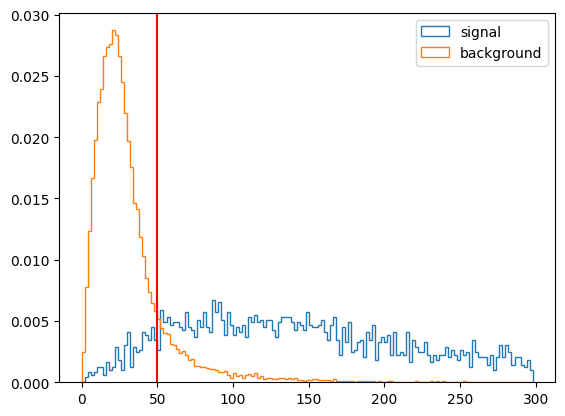

In [15]:
MTvlsgsl_2a_1l_pt_msl=[]
MTvlbgsl_2a_1l_pt_msl=[]
PTvlsgsl_2a_1l_pt_msl=[]
PTvlbgsl_2a_1l_pt_msl=[]

sgsl_2a_1l_pt_msl_PTsl = PTvl_sl(sgsl_2a_1l_pt_msl, MTvlsgsl_2a_1l_pt_msl, PTvlsgsl_2a_1l_pt_msl)
bgsl_2a_1l_pt_msl_PTsl = PTvl_sl(bgsl_2a_1l_pt_msl, MTvlbgsl_2a_1l_pt_msl, PTvlbgsl_2a_1l_pt_msl)

sgsl_2a_1l_pt_msl_PTsl_MTsl = MTvl_sl(sgsl_2a_1l_pt_msl_PTsl, MTvlsgsl_2a_1l_pt_msl, PTvlsgsl_2a_1l_pt_msl)
bgsl_2a_1l_pt_msl_PTsl_MTsl = MTvl_sl(bgsl_2a_1l_pt_msl_PTsl, MTvlbgsl_2a_1l_pt_msl, PTvlbgsl_2a_1l_pt_msl)


print('\033[0;34msg after 2aa_1l_pt , 90<maa<110 , PTvl>50 sl :\033[0m',len(sgsl_2a_1l_pt_msl_PTsl))
print('\033[0;34msg after 2aa_1l_pt , 90<maa<110 , PTvl>50 ,MTvl>58 sl :\033[0m',len(sgsl_2a_1l_pt_msl_PTsl_MTsl))
print('')
print('\033[0;33mbg after 2aa_1l_pt , 90<maa<110 , PTvl>50 sl :\033[0m',len(bgsl_2a_1l_pt_msl_PTsl))
print('\033[0;33mbg after 2aa_1l_pt , 90<maa<110 , PTvl>50 ,MTvl>58 sl :\033[0m',len(bgsl_2a_1l_pt_msl_PTsl_MTsl))


sg_MTvl=[]
bg_MTvl=[]
sg_PTvl=[]
bg_PTvl=[]
MTvl_sl(sgsl_2a_1l,sg_MTvl,sg_PTvl)
MTvl_sl(bgsl_2a_1l,bg_MTvl,bg_PTvl)


plt.figure(1)
bins=np.arange(0,200,1) 
plt.hist(sg_MTvl,bins=bins,histtype='step',label="signal",density='ture')
plt.hist(bg_MTvl,bins=bins,histtype='step',label="background",density='ture')
plt.axvline(58, color='r')
plt.legend()
plt.show


plt.figure(2)
bins=np.arange(0,300,2)
plt.hist(sg_PTvl,bins=bins,histtype='step',label="signal",density='ture')
plt.hist(bg_PTvl,bins=bins,histtype='step',label="background",density='ture')
plt.axvline(50, color='r')
plt.legend()
plt.show


In [8]:

for i in range(len(sg_events)):
    print(np.average(sg_events[:,23]))

[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3032217]
[2.3

<function matplotlib.pyplot.show(close=None, block=None)>

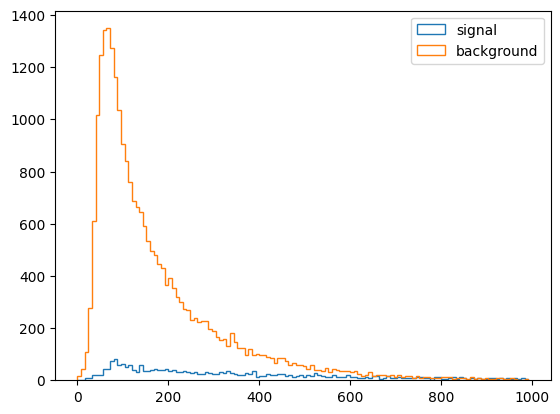

In [9]:
sg_mvl=[]
bg_mvl=[]
mvl_sl(sgsl_2a_1l,sg_mvl)
mvl_sl(bgsl_2a_1l,bg_mvl)

bins=np.arange(0,1000,8) 
plt.hist(sg_mvl,bins=bins,histtype='step',label="signal")
plt.hist(bg_mvl,bins=bins,histtype='step',label="background")
#plt.axvline(80, color='r')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

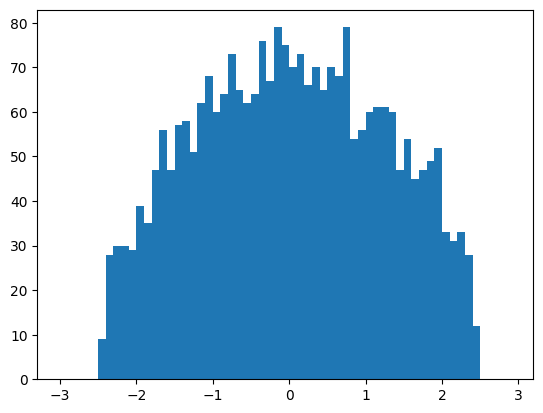

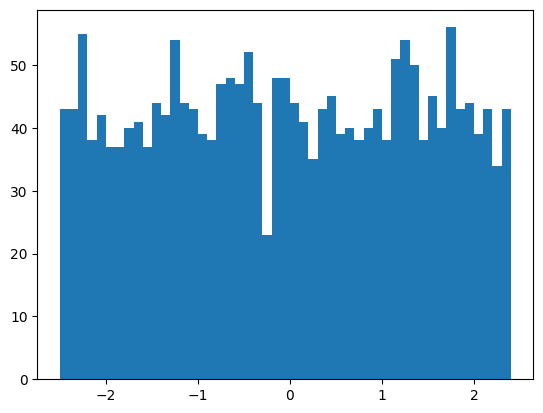

In [10]:
phi1=[]
plt.figure(1)
phi_v(sgsl_2a_1l_pt_msl,phi1)
bins=np.arange(-3,3,0.1)
plt.hist(phi1,bins=bins)
plt.show

phi2=[]
plt.figure(2)
miss_v(sgsl_2a_1l_pt_msl,phi2)
bins=np.arange(-2.5,2.5,0.1)
plt.hist(phi2,bins=bins)
plt.show



3315


<function matplotlib.pyplot.show(close=None, block=None)>

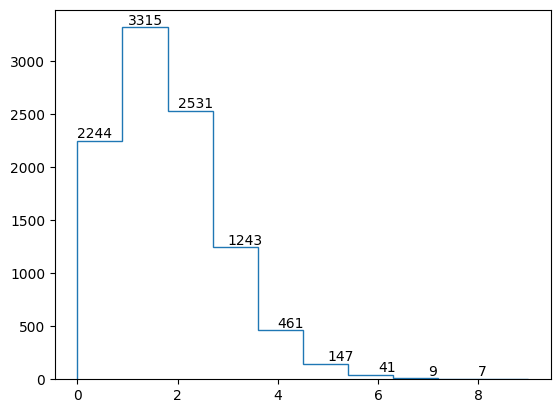

In [11]:
jet_num = []
num = []

jetlen = num_sl(sg_events,18,1)
prlen(jetlen)

for i in range(len(sg_events)):
    jet_num.append(sg_events[i][18])

jetmax=np.max(jet_num)

for i in range(jetmax):
    num.append(i)
  
plt.hist(jet_num,histtype='step')
for i in range(len(num)):
    plt.text(x=num[i], y=len(num_sl(sg_events,18,i)), s=str(len(num_sl(sg_events,18,i))), ha='left', va='bottom')

plt.show


4488
5722


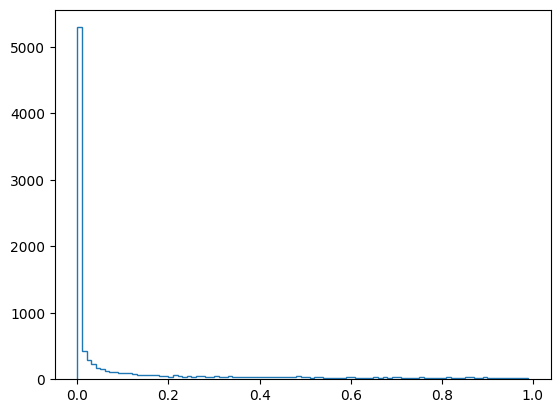

In [12]:
headover = []

def slend(x):
    return x<0.02

for i in range(len(sg_events)):
    for j in range(sg_events[i][18]):
        headover.append(sg_events[i][19][j])

bins=np.arange(0,1,0.01)
plt.hist(headover,bins=bins,histtype='step',label="signal")
plt.show

prlen(num_sl(sg_events,8,2))

b=filter(slend,headover)
print(len(list(b)))

<function matplotlib.pyplot.show(close=None, block=None)>

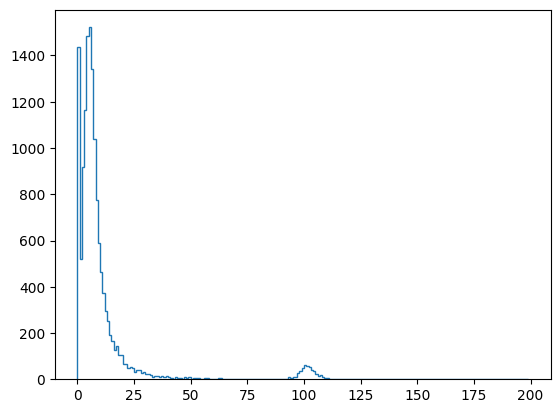

In [13]:
jmass=[]

for i in range(len(sg_events)):
    for j in range(sg_events[i][18]):
        jmass.append(sg_events[i][20][j])

bins=np.arange(0,200,1)
plt.hist(jmass,bins=bins,histtype='step',label="signal")
plt.show